/tmp/ipykernel_9278/4195952618.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=counts.index, y=counts.values, palette=palette)


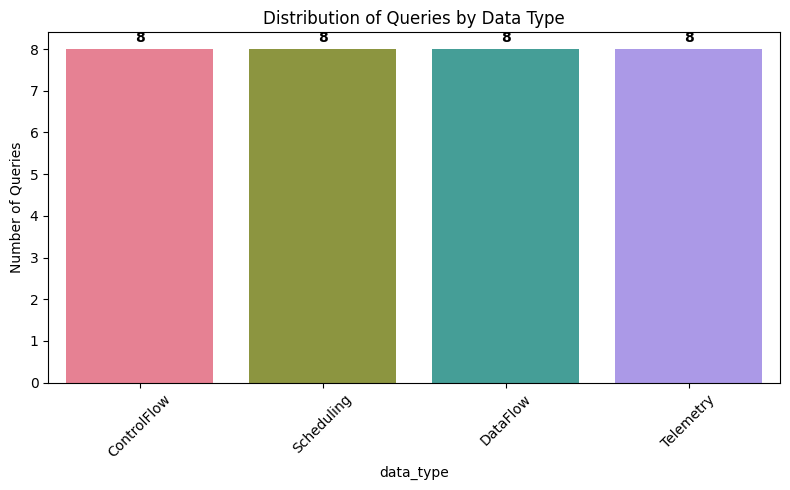

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your queries list (copy-paste from your stored queries)
queries = [
    {
        "id": 1,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["ControlFlow","Scheduling"],
            "prov_type": "Retrospective"
        },
        "query": "For each workflow execution, report the number of tasks executed, and also report the earliest task start time across all workflows.",
        "expected_response": "result = {'task_count_per_workflow': df.groupby('workflow_id').size().reset_index(name='task_count'),'earliest_start_time': df['started_at'].min()}"
    },
    {
        "id": 2, 
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["DataFlow"],
            "prov_type": "Retrospective"
        },
        "query": "For each activity in the last workflow executed, what is the average output?",
        "expected_response": "result = df[df['workflow_id'] == df.loc[pd.to_datetime(df['started_at']).idxmax(), 'workflow_id']].groupby('activity_id').apply(lambda g: g.iloc[-1][{'scale_shift_input':'generated.h','square_and_quarter':'generated.e','sqrt_and_scale':'generated.f','subtract_and_shift':'generated.g','square_and_subtract_one':'generated.d','log_and_shift':'generated.c','power_one_point_five':'generated.b','average_results':'generated.a'}.get(g.name, None)]).dropna().mean()"
    },
    {
        "id": 3,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "What is the execution time per task in the first workflow execution?",
        "expected_response": "result = df[df['workflow_id'] == sorted(df['workflow_id'].unique())[0]][['task_id', 'telemetry_summary.duration_sec']].values.tolist()"
    },
    {
        "id": 4,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["DataFlow"],
            "prov_type": "Prospective"
        },
        "query": "Which tasks would be affected if the inputs of the first activity in the workflow changes?",
        "expected_response": "result = ['scale_shift_input','square_and_quarter','sqrt_and_scale','subtract_and_shift','square_and_subtract_one','log_and_shift','power_one_point_five','average_results']"
    },
    {
        "id": 5,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "What is the activity with the longest total execution time per workflow execution?",
        "expected_response": "result = df.assign(started_at=pd.to_datetime(df['started_at']), ended_at=pd.to_datetime(df['ended_at']), duration=lambda x: (x['ended_at'] - x['started_at']).dt.total_seconds()).groupby(['workflow_id', 'activity_id'])['duration'].sum().reset_index().loc[lambda x: x.groupby('workflow_id')['duration'].idxmax()]"
    },
    {
        "id": 6,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["Telemetry", "ControlFlow"],
            "prov_type": "Retrospective"
        },
        "query": "What is the longest workflow execution?",
        "expected_response": "result = df.assign(started_at=pd.to_datetime(df['started_at']), ended_at=pd.to_datetime(df['ended_at'])).groupby('workflow_id').apply(lambda x: (x['ended_at'].max() - x['started_at'].min()).total_seconds()).idxmax()"
    },
    {
        "id": 7,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["Scheduling"],
            "prov_type": "Retrospective"
        },
        "query": "What node is most often used?",
        "expected_response": "result = df['hostname'].value_counts().idxmax()"
    },
    {
        "id": 8,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "What is the longest task?",
        "expected_response": "result = df['telemetry_summary.duration_sec'].max()"
    },
    {
        "id": 9,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["DataFlow", "ControlFlow"],
            "prov_type": "Prospective"
        },
        "query": "List all activities for all workflow runs.",
        "expected_response": "result = df['activity_id'].dropna().unique().tolist()"
    },
    {
        "id": 10,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["DataFlow", "ControlFlow"],
            "prov_type": "Retrospective"
        },
        "query": "What is the input and output value of the first task executed in the first workflow execution?",
        "expected_response": "result = df.loc[[pd.to_datetime(df['started_at']).idxmin()],['activity_id', 'used.input_value', 'generated.h']].to_dict(orient='records')[0]"
    },
    {
        "id": 11,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["Scheduling", "Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "For the workflow execution that started most recently, which node did each task run on and how long did it take?",
        "expected_response": "result = df[df['workflow_id'] == df.loc[pd.to_datetime(df['started_at']).idxmax(), 'workflow_id']].sort_values(by='started_at')[['hostname','activity_id','telemetry_summary.duration_sec']].apply(tuple,axis=1).tolist()"
    },
    {
        "id": 12,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["DataFlow", "ControlFlow", "Scheduling", "Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "Provide a summary of all activities, including start times, durations, execution nodes, and output values.",
        "expected_response": "result = df.groupby('activity_id').agg({'started_at':['min','max'],'telemetry_summary.duration_sec':'mean','hostname':lambda x:x.dropna().unique().tolist(),'generated.a':'max','generated.b':'max','generated.c':'max','generated.d':'max','generated.e':'max','generated.f':'max','generated.g':'max','generated.h':'max'})"
    },
    {
        "id": 13,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["DataFlow", "ControlFlow", "Scheduling", "Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": "For the first workflow execution, list all tasks with their start times, durations, nodes, and output values.",
        "expected_response": "result = df[df['workflow_id'] == sorted(df['workflow_id'].unique())[0]][['activity_id','started_at','telemetry_summary.duration_sec','hostname','generated.a','generated.b','generated.c','generated.d','generated.e','generated.f','generated.g','generated.h']].sort_values('started_at')"
    },
    {
        "id": 14,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["ControlFlow", "Scheduling"],
            "prov_type": "Retrospective"
        },
        "query": "For each workflow, list the unique activities executed in the order they started, and also report how many unique campaigns there are.",
        "expected_response": "result = {'activities_per_workflow': df.sort_values(['workflow_id','started_at']).groupby('workflow_id')['activity_id'].apply(list), 'unique_campaign_count': df['campaign_id'].nunique()}"
    },
    {
        "id": 15, 
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["DataFlow"],
            "prov_type": "Retrospective"
        },
        "query": "Looking at all workflow executions, what is the minimum output value assocaited with each activity?",
        "expected_response": "result = df.groupby('activity_id').apply(lambda g: g[{'scale_shift_input':'generated.h','square_and_quarter':'generated.e','sqrt_and_scale':'generated.f','subtract_and_shift':'generated.g','square_and_subtract_one':'generated.d','log_and_shift':'generated.c','power_one_point_five':'generated.b','average_results':'generated.a'}.get(g.name, None)].min()).dropna()"
    },
    {
        "id": 16,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["Scheduling"],
            "prov_type": "Retrospective"
        },
        "query": "For the first workflow, which node did each task start on?",
        "expected_response": "result = df[df['workflow_id'] == sorted(df['workflow_id'].unique())[0]][['task_id', 'hostname']].drop_duplicates()"
    },
    {
        "id": 17,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["ControlFlow"],
            "prov_type": "Retrospective"
        },
        "query": "Which activities ran in parallel?",
        "expected_response": "result = df.loc[((df[[c for c in df.columns if c.startswith('used.')]].shift() == df[[c for c in df.columns if c.startswith('used.')]]) | (df[[c for c in df.columns if c.startswith('used.')]].shift(-1) == df[[c for c in df.columns if c.startswith('used.')]])).any(axis=1), ['workflow_id','activity_id'] + [c for c in df.columns if c.startswith('used.')]]"
    },
    {
        "id": 18,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLAP",
            "data_type": ["Scheduling"],
            "prov_type": "Retrospective"
        },
        "query": "Which node executed the most tasks in the latest workflow run?",
        "expected_response": "result = df['hostname'].value_counts().idxmax()"
    },
    {
        "id": 19,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["DataFlow"],
            "prov_type": "Retrospective"
        },
        "query": "For each activity, return the largest value used during the last 5 workflow executions.",
        "expected_response": "result = sorted(df['workflow_id'].unique())[-5:]"
    },
    {
        "id": 20,
        "classification": {
            "who": "Human",
            "when": "Online",
            "scope": "Targeted Query",
            "query_type": "OLTP",
            "data_type": ["Telemetry"],
            "prov_type": "Retrospective"
        },
        "query": " List all workflows that took longer than 2 minutes to execute.",
        "expected_response": "result = df.assign(started_at=pd.to_datetime(df['started_at']), ended_at=pd.to_datetime(df['ended_at'])).groupby('workflow_id').filter(lambda x: (x['ended_at'].max() - x['started_at'].min()).total_seconds() > 120)['workflow_id'].unique().tolist()"
    }
]

# Assuming queries is already defined and df created as you showed
df = pd.DataFrame(queries)

classification_df = pd.json_normalize(df['classification'])
df = pd.concat([df.drop(columns=['classification']), classification_df], axis=1)

df_exp = df.explode('data_type')

counts = df_exp['data_type'].value_counts()

plt.figure(figsize=(8,5))
# Use a color palette with enough distinct colors
palette = sns.color_palette("husl", len(counts))

barplot = sns.barplot(x=counts.index, y=counts.values, palette=palette)

plt.xticks(rotation=45)
plt.ylabel('Number of Queries')
plt.title('Distribution of Queries by Data Type')

# Add the count numbers on top of the bars
for i, count in enumerate(counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()




/tmp/ipykernel_9278/879624324.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=query_type_counts.index, y=query_type_counts.values, palette=palette)


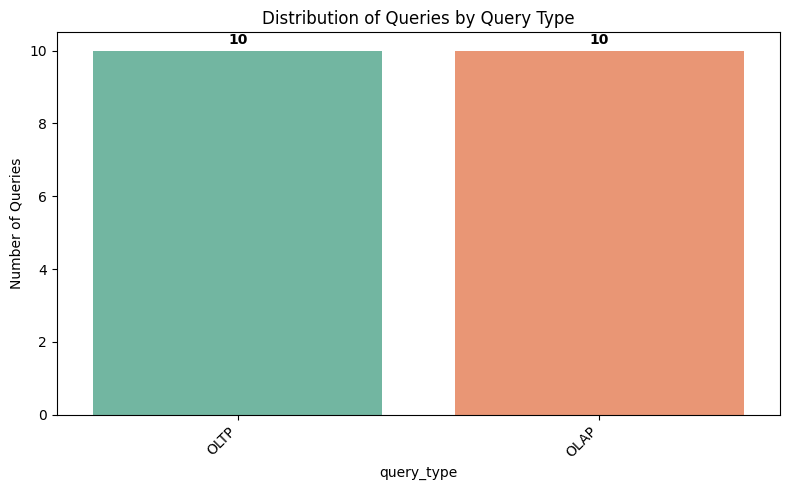

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming queries list already exists and loaded as 'queries'
df = pd.DataFrame(queries)

# Normalize the classification column
classification_df = pd.json_normalize(df['classification'])
df = pd.concat([df.drop(columns=['classification']), classification_df], axis=1)

# Count queries per query_type
query_type_counts = df['query_type'].value_counts()

# Plot
plt.figure(figsize=(8,5))
palette = sns.color_palette("Set2", len(query_type_counts))

barplot = sns.barplot(x=query_type_counts.index, y=query_type_counts.values, palette=palette)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Queries')
plt.title('Distribution of Queries by Query Type')

# Add counts on top of bars
for i, count in enumerate(query_type_counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


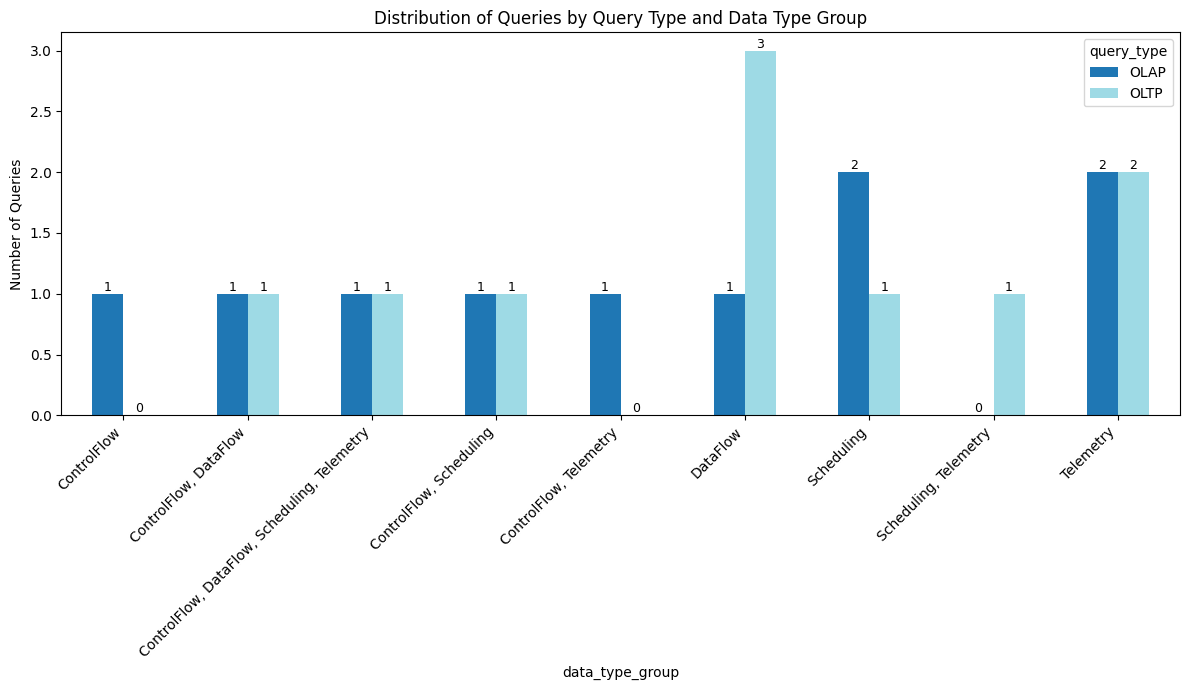

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming queries list already exists and loaded as 'queries'
df = pd.DataFrame(queries)

# Normalize the classification column
classification_df = pd.json_normalize(df['classification'])
df = pd.concat([df.drop(columns=['classification']), classification_df], axis=1)

# Create data_type_group label by joining sorted data_type list
df['data_type_group'] = df['data_type'].apply(lambda x: ", ".join(sorted(x)))

# Group by query_type and data_type_group and count
grouped_counts = df.groupby(['query_type', 'data_type_group']).size().reset_index(name='count')

# Pivot to wide format for grouped barplot
pivot_df = grouped_counts.pivot(index='data_type_group', columns='query_type', values='count').fillna(0)

# Plot grouped barplot
pivot_df.plot(kind='bar', figsize=(12,7), colormap='tab20')

plt.ylabel('Number of Queries')
plt.title('Distribution of Queries by Query Type and Data Type Group')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with count values
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


In [2]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


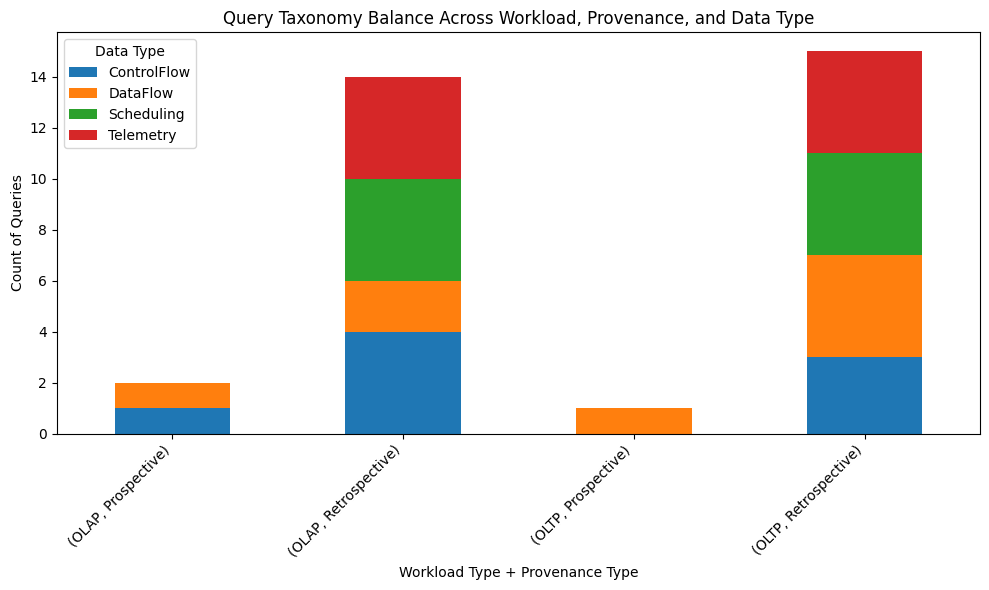

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# your `queries` list should be defined before this

# Build (Workload Type, Provenance Type, Data Type) triples
triples = []
for q in queries:
    workload = q['classification']['query_type']
    provenance = q['classification']['prov_type']
    data_types = q['classification']['data_type']
    for dt in data_types:
        triples.append((workload, provenance, dt))

# Count combinations
counter = Counter(triples)

# Convert to DataFrame
df = pd.DataFrame([
    {"Workload": k[0], "Provenance": k[1], "Data Type": k[2], "Count": v}
    for k, v in counter.items()
])

# Pivot for stacked bar
pivot = df.pivot_table(index=['Workload', 'Provenance'], columns='Data Type', values='Count', fill_value=0)

# Plot
ax = pivot.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Query Taxonomy Balance Across Workload, Provenance, and Data Type")
plt.xlabel("Workload Type + Provenance Type")
plt.ylabel("Count of Queries")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()


ValueError: Unknown format code 'd' for object of type 'float'

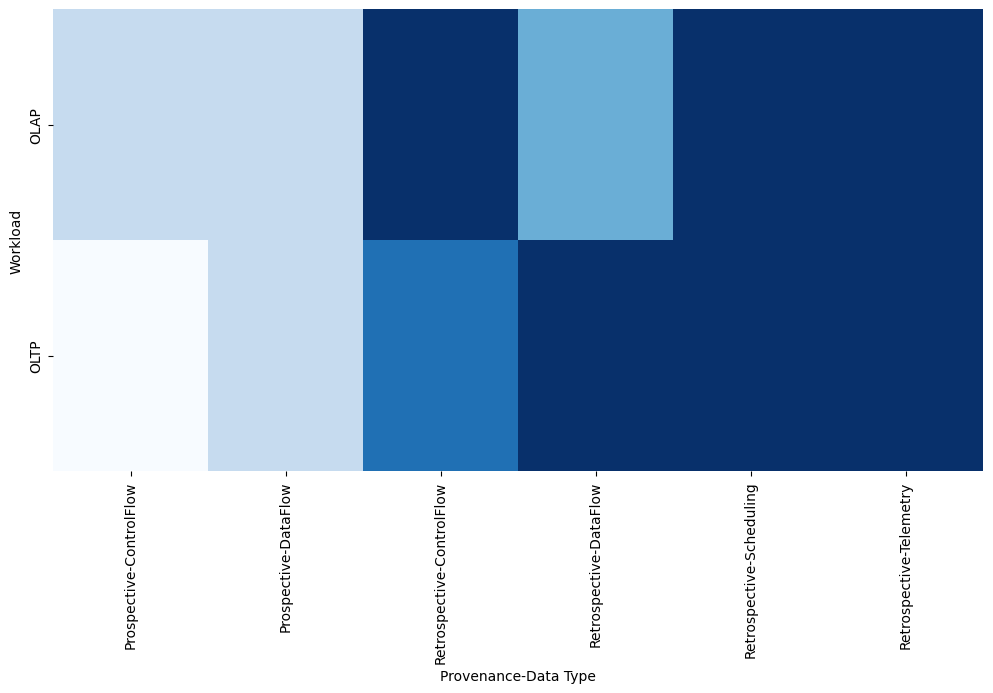

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` created as before
heatmap_df = df.groupby(['Workload', 'Provenance', 'Data Type']).sum().reset_index()
pivot = heatmap_df.pivot_table(index='Workload', columns=['Provenance', 'Data Type'], values='Count', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title("Query Taxonomy Heatmap: Workload vs Provenance+DataType")
plt.ylabel("Workload Type")
plt.xlabel("Provenance Type + Data Type")
plt.tight_layout()
plt.show()


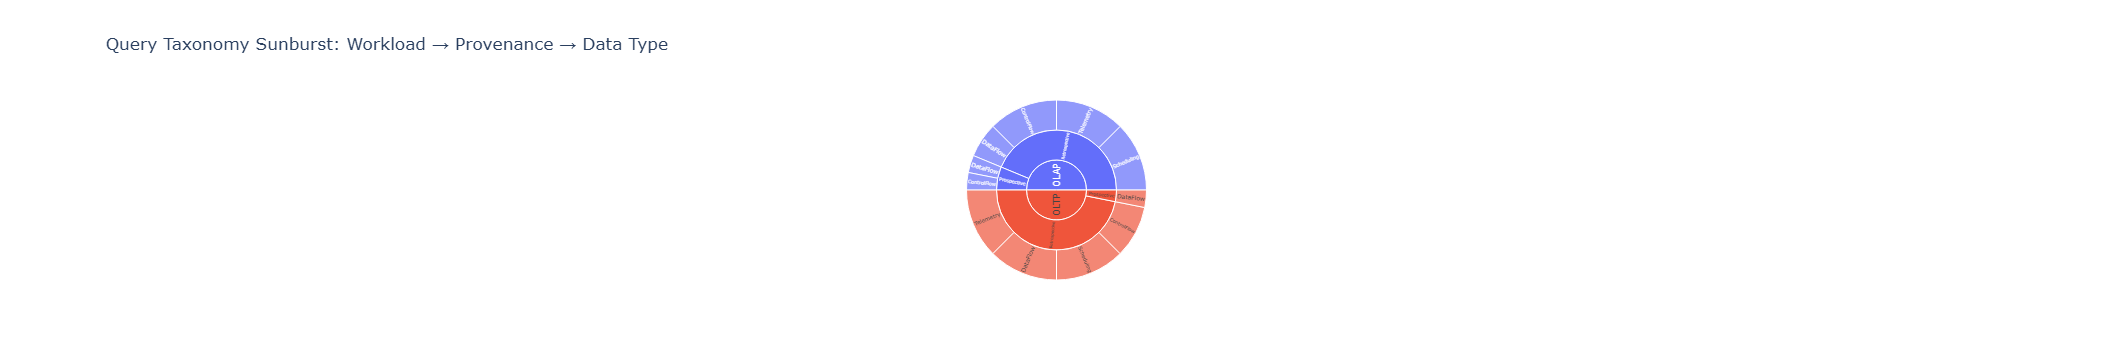

In [60]:
import plotly.express as px

fig = px.sunburst(
    sunburst_df,
    path=['Workload', 'Provenance', 'Data Type'],
    values='Count',
    title="Query Taxonomy Sunburst: Workload → Provenance → Data Type",
    color='Workload'  # Optional for visual separation
)

fig.update_traces(insidetextorientation='radial')  # cleaner label alignment
fig.show()


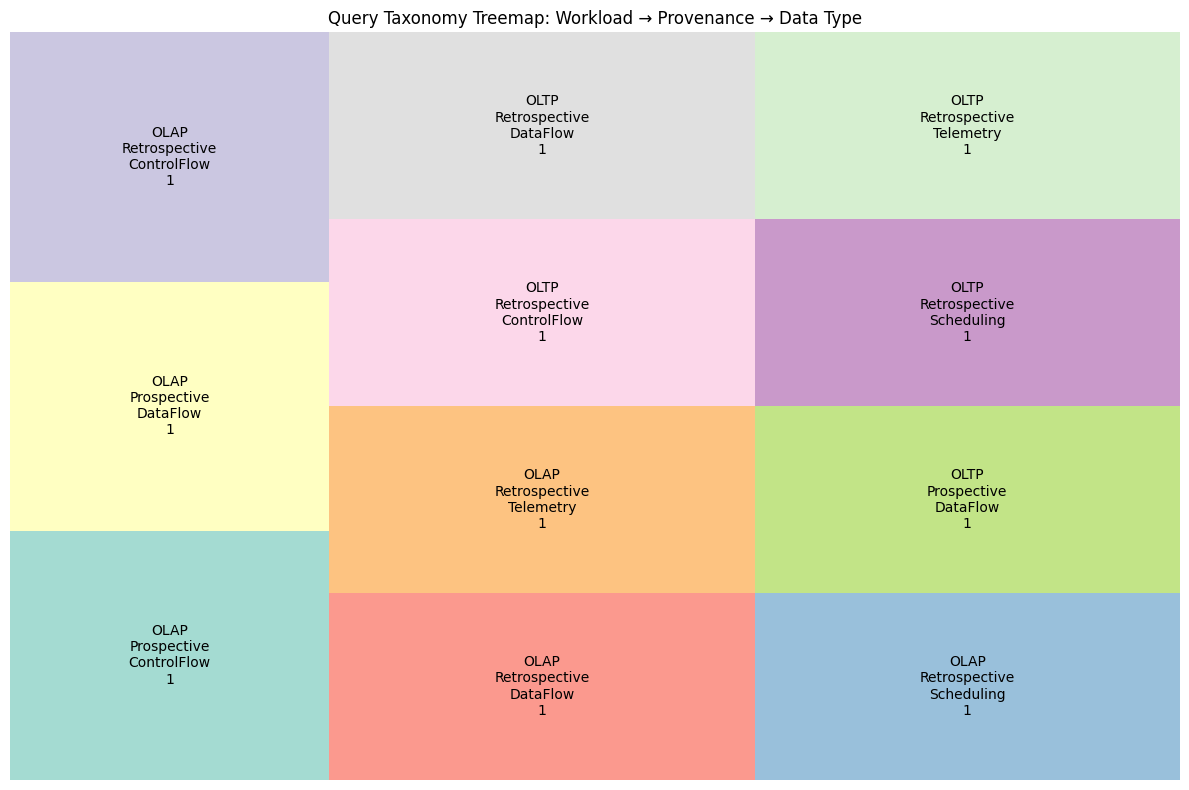

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Example structure if your df has 'Workload', 'Provenance', 'Data Type'
# Create aggregated counts per combination
treemap_df = df.groupby(['Workload', 'Provenance', 'Data Type']).size().reset_index(name='Count')

# Labels for each rectangle: "Workload\nProvenance\nData Type\nCount"
treemap_df['Label'] = (
    treemap_df['Workload'] + '\n' +
    treemap_df['Provenance'] + '\n' +
    treemap_df['Data Type'] + '\n' +
    treemap_df['Count'].astype(str)
)

# Plot
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(range(len(treemap_df)))  # A pleasant categorical color palette

squarify.plot(
    sizes=treemap_df['Count'],
    label=treemap_df['Label'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10}
)

plt.axis('off')
plt.title("Query Taxonomy Treemap: Workload → Provenance → Data Type")
plt.tight_layout()
plt.show()


In [45]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


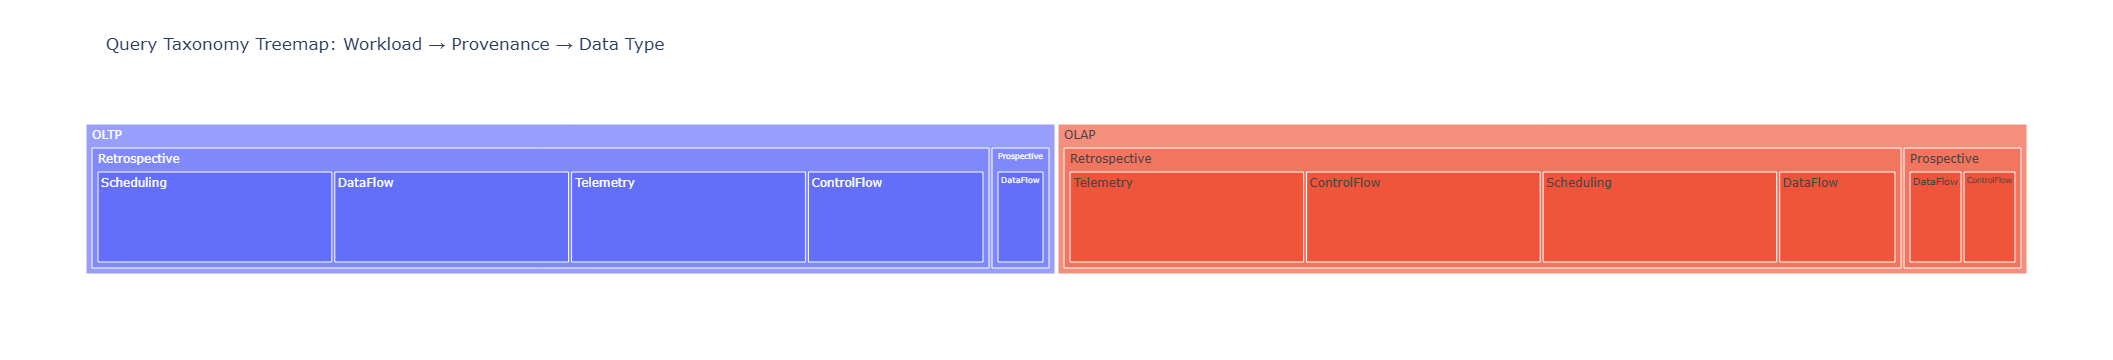

In [62]:
fig = px.treemap(
    sunburst_df,
    path=['Workload', 'Provenance', 'Data Type'],
    values='Count',
    title="Query Taxonomy Treemap: Workload → Provenance → Data Type"
)
fig.show()


/tmp/ipykernel_45010/1088269219.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




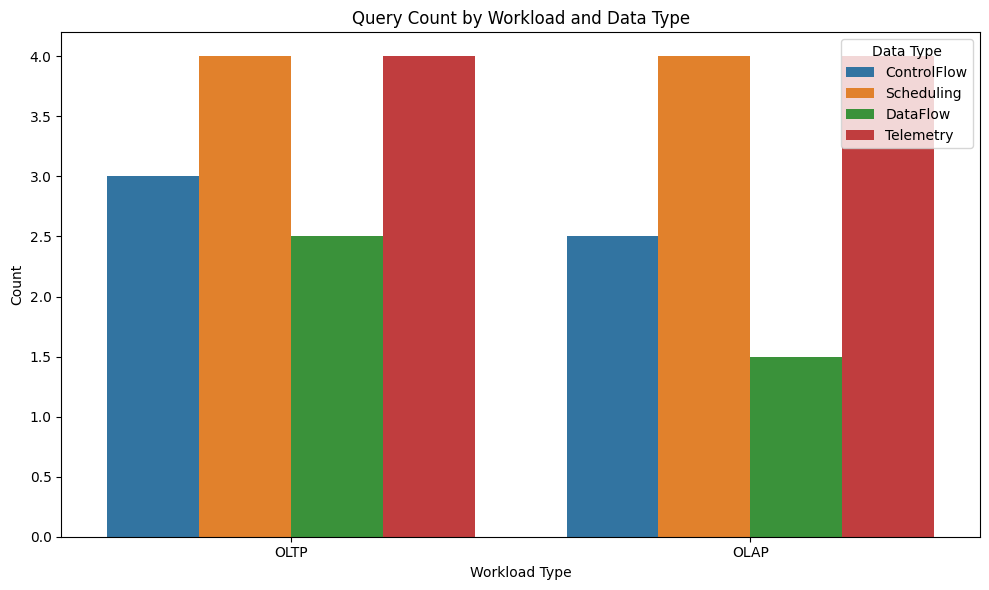

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Workload',
    y='Count',
    hue='Data Type',
    ci=None
)
plt.title("Query Count by Workload and Data Type")
plt.ylabel("Count")
plt.xlabel("Workload Type")
plt.legend(title="Data Type")
plt.tight_layout()
plt.show()


/tmp/ipykernel_45010/779270746.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




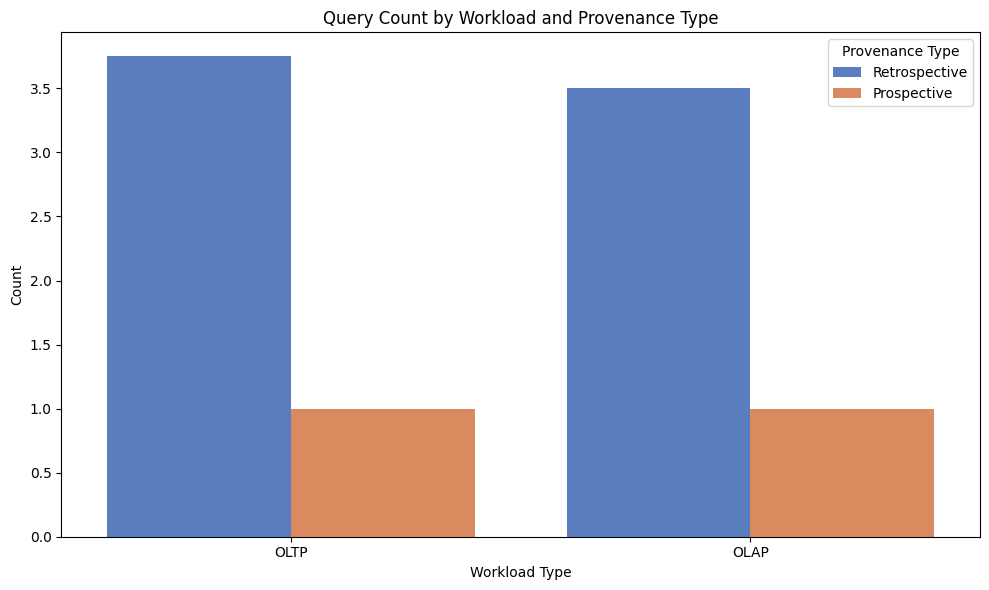

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Workload',
    y='Count',
    hue='Provenance',
    ci=None,
    palette='muted',
    dodge=True
)
plt.title("Query Count by Workload and Provenance Type")
plt.ylabel("Count")
plt.xlabel("Workload Type")
plt.legend(title="Provenance Type")
plt.tight_layout()
plt.show()
